In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Wczytujemy dane

In [23]:
#import os
#os.getcwd()
file_path = '/Users/andriisenchyshyn/Desktop/Dyplom/Zwartowo2.csv'  

In [34]:
df = pd.read_csv(file_path, skiprows=9, sep=';')

In [37]:
df.head()

,time,G(i),H_sun,T2m,WS10m,Int
0,20050101:0030,0.0,0.0,4.16,1.24,0.0
1,20050101:0130,0.0,0.0,4.14,1.10,0.0
2,20050101:0230,0.0,0.0,4.08,1.03,0.0
3,20050101:0330,0.0,0.0,4.06,1.31,0.0
4,20050101:0430,0.0,0.0,4.10,1.79,0.0


In [40]:
df.columns

Index(['time', 'G(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], dtype='object')

In [41]:
df.shape

(166536, 6)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166536 entries, 0 to 166535
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    166536 non-null  object 
 1   G(i)    166536 non-null  float64
 2   H_sun   166536 non-null  float64
 3   T2m     166536 non-null  float64
 4   WS10m   166536 non-null  float64
 5   Int     166536 non-null  float64
dtypes: float64(5), object(1)
memory usage: 7.6+ MB


Przekształcamy kolumnę 'time'

In [44]:
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')
df['rok'] = df['time'].dt.year
df['miesiąc'] = df['time'].dt.month
df['dzień'] = df['time'].dt.day
df['godzina'] = df['time'].dt.hour

In [49]:
df.head()

,time,G(i),H_sun,T2m,WS10m,Int,rok,miesiąc,dzień,godzina
0,2005-01-01 00:30:00,0.0,0.0,4.16,1.24,0.0,2005,1,1,0
1,2005-01-01 01:30:00,0.0,0.0,4.14,1.10,0.0,2005,1,1,1
2,2005-01-01 02:30:00,0.0,0.0,4.08,1.03,0.0,2005,1,1,2
3,2005-01-01 03:30:00,0.0,0.0,4.06,1.31,0.0,2005,1,1,3
4,2005-01-01 04:30:00,0.0,0.0,4.10,1.79,0.0,2005,1,1,4


In [46]:
df.columns

Index(['time', 'G(i)', 'H_sun', 'T2m', 'WS10m', 'Int', 'rok', 'miesiąc',
       'dzień', 'godzina'],
      dtype='object')

Średnia miesięczna irradiancja G(i)


In [50]:
mies_avg = df.groupby('miesiąc')["G(i)"].mean()

In [51]:
mies_avg

miesiąc
1      14.985320
2      29.470234
3      46.938549
4      98.392654
5     157.596352
6     183.617393
7     162.474189
8     111.036307
9      54.318175
10     30.049346
11     16.440689
12     10.739641
Name: G(i), dtype: float64

Wykres – średnia irradiacja miesięczna

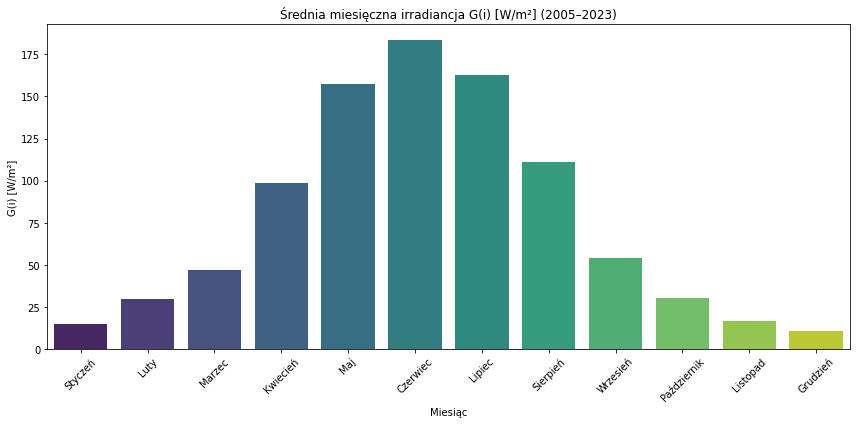

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=mies_avg.index, y=mies_avg.values, palette="viridis")
plt.title("Średnia miesięczna irradiancja G(i) [W/m²] (2005–2023)")
plt.xlabel("Miesiąc")
plt.ylabel("G(i) [W/m²]")
plt.xticks(range(0, 12), 
           ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
            'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'], rotation=45)
plt.tight_layout()
plt.show()

Analiza corelacji

Wybieramy istotne kolumny

In [54]:
parametry = df[['G(i)', 'T2m', 'H_sun', 'WS10m']]

Obliczamy macierz korelacji

In [55]:
corr_matrix = parametry.corr()

In [56]:
corr_matrix

,G(i),T2m,H_sun,WS10m
G(i),1.000000,0.516090,0.919988,0.054134
T2m,0.516090,1.000000,0.488399,-0.028854
H_sun,0.919988,0.488399,1.000000,0.109304
WS10m,0.054134,-0.028854,0.109304,1.000000


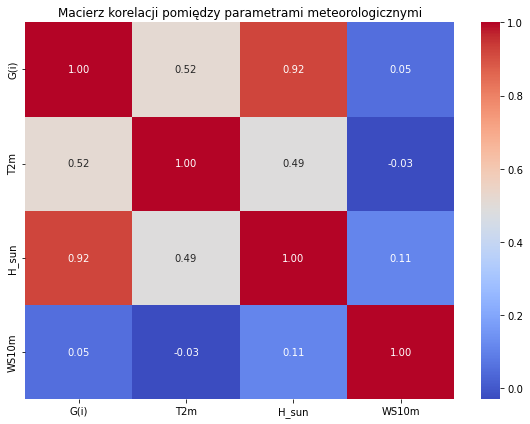

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji pomiędzy parametrami meteorologicznymi")
plt.tight_layout()
plt.show()

Regresja liniowa

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

Dane do modelu

In [59]:
X = df[['T2m', 'H_sun', 'WS10m']]  
y = df['G(i)']   

Podział na zbiór treningowy i testowy

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Trening modelu

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predykcja

In [62]:
y_pred = model.predict(X_test)

Ocena modelu

In [63]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [64]:
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.853
RMSE: 43.42


In [65]:
r2

0.852601839178789

In [66]:
rmse

43.4219578921317

Wykres – rzeczywiste vs przewidywane

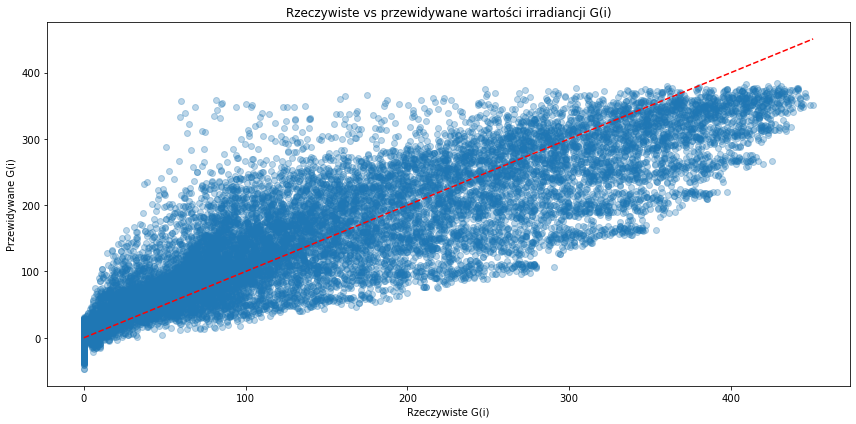

In [68]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title("Rzeczywiste vs przewidywane wartości irradiancji G(i)")
plt.xlabel("Rzeczywiste G(i)")
plt.ylabel("Przewidywane G(i)")
plt.tight_layout()
plt.show()

Model drzewa decyzyjnego

In [69]:
from sklearn.tree import DecisionTreeRegressor

Model drzewa

In [70]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

Predykcja

In [71]:
y_tree_pred = tree_model.predict(X_test)

Ocena

In [72]:
r2_tree = r2_score(y_test, y_tree_pred)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_tree_pred))

In [73]:
print(f"Decision Tree - R²: {r2_tree:.3f}")
print(f"Decision Tree - RMSE: {rmse_tree:.2f}")

Decision Tree - R²: 0.861
Decision Tree - RMSE: 42.12


In [74]:
r2_tree

0.8613081466523937

In [75]:
rmse_tree

42.12004683385447

Wykres: rzeczywiste vs przewidywane

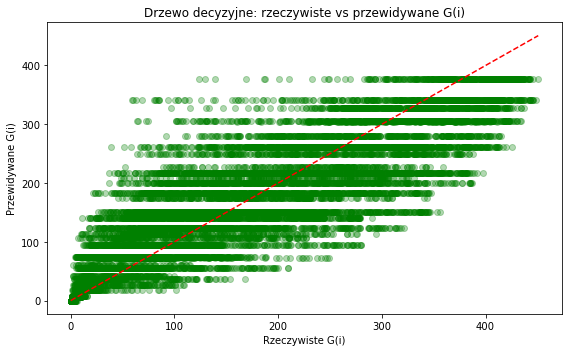

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_tree_pred, alpha=0.3, color='green')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title("Drzewo decyzyjne: rzeczywiste vs przewidywane G(i)")
plt.xlabel("Rzeczywiste G(i)")
plt.ylabel("Przewidywane G(i)")
plt.tight_layout()
plt.show()

Wykres ważności cech

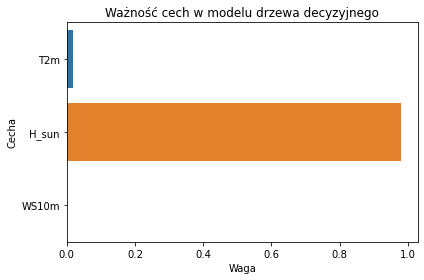

In [77]:
importances = tree_model.feature_importances_
cechy = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=cechy)
plt.title("Ważność cech w modelu drzewa decyzyjnego")
plt.xlabel("Waga")
plt.ylabel("Cecha")
plt.tight_layout()
plt.show()

Analiza trendu w czasie (2005–2023)

Roczna średnia irradiacja i temperatura

In [78]:
trend_data = df.groupby('rok')[['G(i)', 'T2m']].mean().reset_index()

Wykres trendu irradiancji

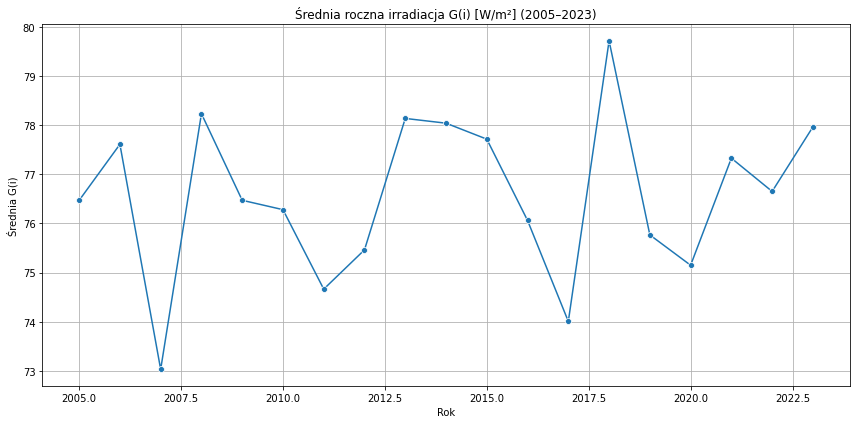

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='rok', y='G(i)', marker='o')
plt.title("Średnia roczna irradiacja G(i) [W/m²] (2005–2023)")
plt.xlabel("Rok")
plt.ylabel("Średnia G(i)")
plt.grid(True)
plt.tight_layout()
plt.show()

Wykres trendu temperatury

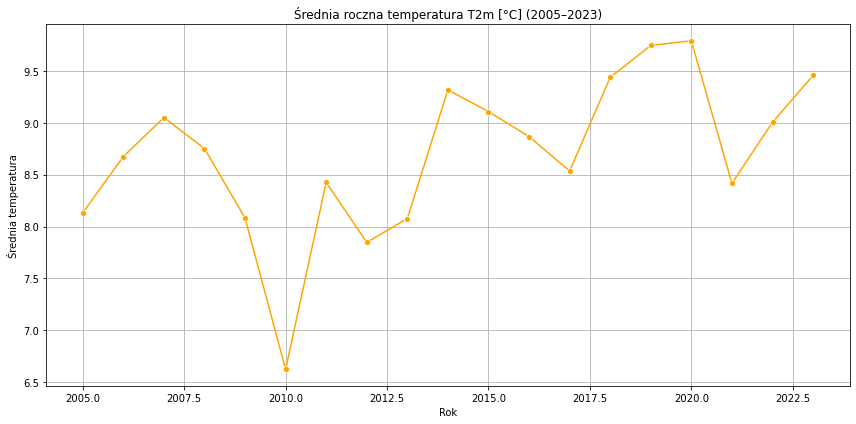

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='rok', y='T2m', marker='o', color='orange')
plt.title("Średnia roczna temperatura T2m [°C] (2005–2023)")
plt.xlabel("Rok")
plt.ylabel("Średnia temperatura")
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

Tworzymy model

In [85]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predykcja

In [86]:
y_rf_pred = rf.predict(X_test)

Ocena

In [87]:
r2 = r2_score(y_test, y_rf_pred)
rmse = mean_squared_error(y_test, y_rf_pred, squared=False)

print(f"Random Forest - R²: {r2:.3f}")
print(f"Random Forest - RMSE: {rmse:.2f}")

Random Forest - R²: 0.875
Random Forest - RMSE: 40.00


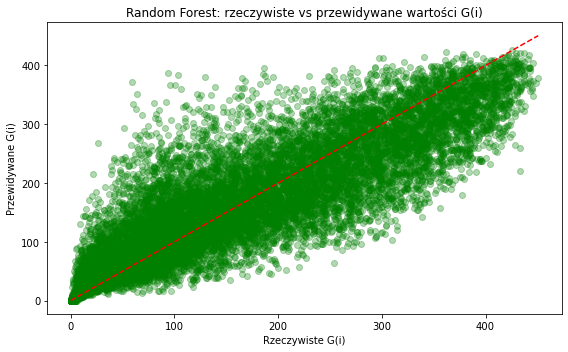

In [94]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_rf_pred, alpha=0.3, color='green')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title("Random Forest: rzeczywiste vs przewidywane wartości G(i)")
plt.xlabel("Rzeczywiste G(i)")
plt.ylabel("Przewidywane G(i)")
plt.tight_layout()
plt.show()

Analiza rozkładu reszt (Random Forest)

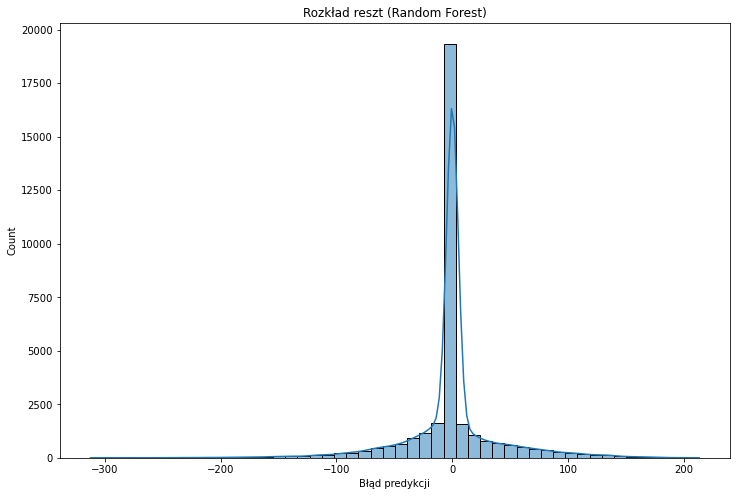

In [92]:
residuals_rf = y_test - y_rf_pred

plt.figure(figsize=(12, 8))
sns.histplot(residuals_rf, bins=50, kde=True)
plt.title("Rozkład reszt (Random Forest)")
plt.xlabel("Błąd predykcji")
plt.show()

Prognoza średniej temperatury T2m na 2030

Przygotowanie danych: średnia roczna temperatura

Zakładamy, że df już zawiera kolumnę 'year'

In [97]:
df.columns


Index(['time', 'G(i)', 'H_sun', 'T2m', 'WS10m', 'Int', 'rok', 'miesiąc',
       'dzień', 'godzina'],
      dtype='object')

In [123]:
temp_by_year = df.groupby('rok')['T2m'].mean().reset_index()

In [124]:
X_temp = temp_by_year[['rok']]
y_temp = temp_by_year['T2m']
model_temp = LinearRegression().fit(X_temp, y_temp)

In [125]:
temp_2030 = model_temp.predict([[2030]])[0]
print(f"Prognozowana temperatura T2m w 2030: {temp_2030:.2f} °C")

Prognozowana temperatura T2m w 2030: 9.81 °C


/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


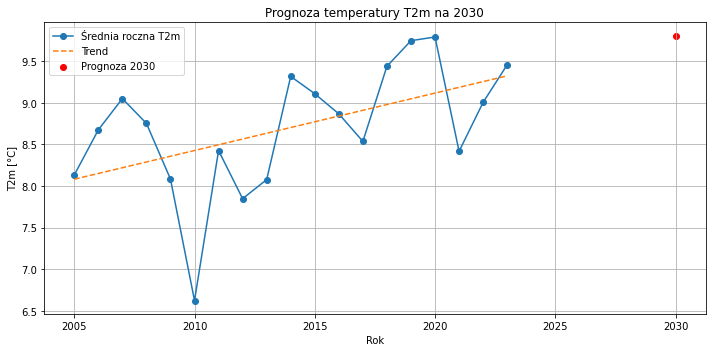

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(temp_by_year['rok'], y_temp, marker='o', label='Średnia roczna T2m')
plt.plot(temp_by_year['rok'], model_temp.predict(X_temp), linestyle='--', label='Trend')
plt.scatter(2030, temp_2030, color='red', label='Prognoza 2030')
plt.title('Prognoza temperatury T2m na 2030')
plt.xlabel('Rok')
plt.ylabel('T2m [°C]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Prognoza WS10m na 2030

Grupowanie danych: średnia roczna prędkość wiatru

In [127]:
wind_by_year = df.groupby('rok')['WS10m'].mean().reset_index()

In [128]:
X_wind = wind_by_year[['rok']]
y_wind = wind_by_year['WS10m']
model_wind = LinearRegression().fit(X_wind, y_wind)

In [129]:
wind_2030 = model_wind.predict([[2030]])[0]
print(f"Prognozowana prędkość wiatru WS10m w 2030: {wind_2030:.2f} m/s")

Prognozowana prędkość wiatru WS10m w 2030: 3.73 m/s


/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


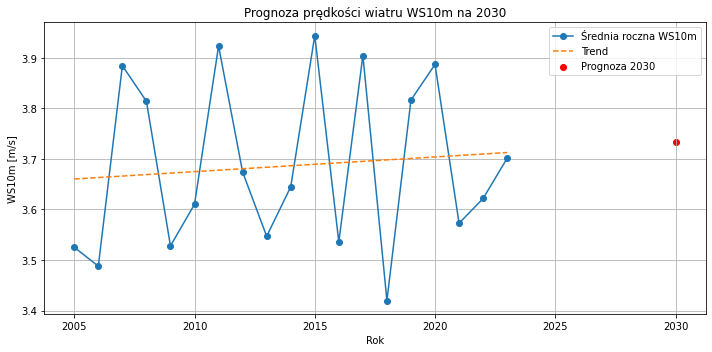

In [130]:
plt.figure(figsize=(10, 5))
plt.plot(wind_by_year['rok'], y_wind, marker='o', label='Średnia roczna WS10m')
plt.plot(wind_by_year['rok'], model_wind.predict(X_wind), linestyle='--', label='Trend')
plt.scatter(2030, wind_2030, color='red', label='Prognoza 2030')
plt.title('Prognoza prędkości wiatru WS10m na 2030')
plt.xlabel('Rok')
plt.ylabel('WS10m [m/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Średnia wysokość Słońca (H_sun) z miesięcy letnich (czerwiec, lipiec, sierpień)

In [131]:
h_sun_avg = df['H_sun'].mean()
print(f"Średnia wartość H_sun (lato): {h_sun_avg:.2f}°")

Średnia wartość H_sun (lato): 11.96°


Przygotowanie danych do predykcji

In [132]:
future_input = pd.DataFrame({
    'T2m': [temp_2030],
    'H_sun': [h_sun_avg],
    'WS10m': [wind_2030]
})


Predykcja irradiancji z wcześniej wytrenowanego modelu Random Forest

In [133]:
g_pred_2030_yearly = rf.predict(future_input)[0]
print(f"Prognozowana irradiancja G(i) (średnioroczna) na 2030: {g_pred_2030_yearly:.2f} W/m²")

Prognozowana irradiancja G(i) (średnioroczna) na 2030: 77.97 W/m²


Regresja czasu rok → G(i)

Grupowanie danych: średnia roczna irradiancja

In [134]:
irr_by_year = df.groupby('rok')['G(i)'].mean().reset_index()

In [135]:
X_irr = irr_by_year[['rok']]
y_irr = irr_by_year['G(i)']
model_irr = LinearRegression().fit(X_irr, y_irr)

Prognoza G(i) na 2030 wg trendu liniowego

In [136]:
gi_trend_2030 = model_irr.predict([[2030]])[0]
print(f"G(i) 2030 wg trendu liniowego: {gi_trend_2030:.2f} W/m²")

G(i) 2030 wg trendu liniowego: 77.31 W/m²


/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Wykres porównawczy

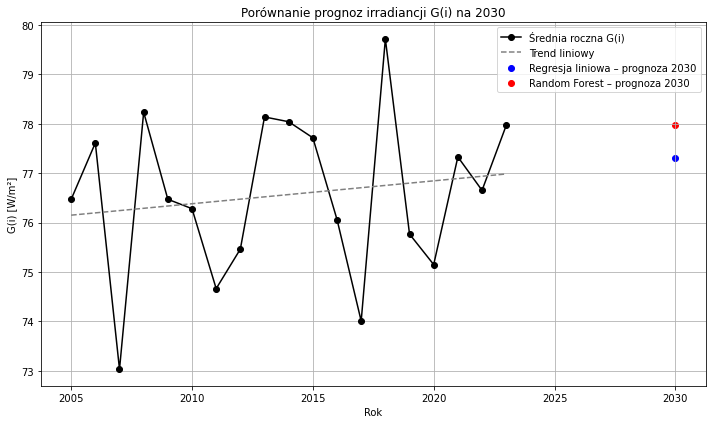

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(irr_by_year['rok'], y_irr, marker='o', label='Średnia roczna G(i)', color='black')
plt.plot(irr_by_year['rok'], model_irr.predict(X_irr), linestyle='--', label='Trend liniowy', color='gray')


plt.scatter(2030, 77.31, color='blue', label='Regresja liniowa – prognoza 2030')
plt.scatter(2030, 77.97, color='red', label='Random Forest – prognoza 2030')

plt.title('Porównanie prognoz irradiancji G(i) na 2030')
plt.xlabel('Rok')
plt.ylabel('G(i) [W/m²]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

rozdzil 6

In [253]:
df_monachium = pd.read_csv('/Users/andriisenchyshyn/Desktop/Dyplom/Monachium.csv', skiprows=10, sep=';')

In [254]:
df_monachium.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,20050101:0010,0.0,0.0,0.0,0.86,2.48,0.0
1,20050101:0110,0.0,0.0,0.0,0.95,2.62,0.0
2,20050101:0210,0.0,0.0,0.0,1.31,2.90,0.0
3,20050101:0310,0.0,0.0,0.0,1.62,2.97,0.0
4,20050101:0410,0.0,0.0,0.0,1.86,3.03,0.0


In [255]:
df_monachium.columns

Index(['time', 'P', 'G(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], dtype='object')

Rozdzielenie daty

In [256]:
df_monachium['rok'] = df_monachium['time'].str[:4].astype(int)
df_monachium['miesiąc'] = df_monachium['time'].str[4:6].astype(int)
df_monachium['dzień'] = df_monachium['time'].str[6:8].astype(int)

In [257]:
df_monachium.head()

,time,P,G(i),H_sun,T2m,WS10m,Int,rok,miesiąc,dzień
0,20050101:0010,0.0,0.0,0.0,0.86,2.48,0.0,2005,1,1
1,20050101:0110,0.0,0.0,0.0,0.95,2.62,0.0,2005,1,1
2,20050101:0210,0.0,0.0,0.0,1.31,2.90,0.0,2005,1,1
3,20050101:0310,0.0,0.0,0.0,1.62,2.97,0.0,2005,1,1
4,20050101:0410,0.0,0.0,0.0,1.86,3.03,0.0,2005,1,1


Agregacja średniej rocznej irradiacji

In [258]:
irr_by_year_monachium = df_monachium.groupby('rok')['G(i)'].mean().reset_index()
irr_by_year_monachium.columns = ['rok', 'G(i)_avg']

In [259]:
irr_by_year_monachium

,rok,G(i)_avg
0,2005,86.041139
1,2006,90.121847
2,2007,90.715735
3,2008,86.693262
4,2009,87.263281
5,2010,83.872227
6,2011,87.675378
7,2012,89.238256
8,2013,85.347521
9,2014,87.571881


robimy to samo dla iinych miast

In [260]:
df_lizbona = pd.read_csv('/Users/andriisenchyshyn/Desktop/Dyplom/Lizbona.csv', skiprows=10, sep=';')

In [261]:
df_lizbona.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,20050101:0010,0.0,0.0,0.0,10.19,2.48,0.0
1,20050101:0110,0.0,0.0,0.0,9.86,2.62,0.0
2,20050101:0210,0.0,0.0,0.0,9.70,2.62,0.0
3,20050101:0310,0.0,0.0,0.0,9.53,2.34,0.0
4,20050101:0410,0.0,0.0,0.0,9.35,2.07,0.0


In [262]:
df_lizbona['rok'] = df_lizbona['time'].str[:4].astype(int)
df_lizbona['miesiąc'] = df_lizbona['time'].str[4:6].astype(int)
df_lizbona['dzień'] = df_lizbona['time'].str[6:8].astype(int)

In [263]:
df_lizbona.head()

,time,P,G(i),H_sun,T2m,WS10m,Int,rok,miesiąc,dzień
0,20050101:0010,0.0,0.0,0.0,10.19,2.48,0.0,2005,1,1
1,20050101:0110,0.0,0.0,0.0,9.86,2.62,0.0,2005,1,1
2,20050101:0210,0.0,0.0,0.0,9.70,2.62,0.0,2005,1,1
3,20050101:0310,0.0,0.0,0.0,9.53,2.34,0.0,2005,1,1
4,20050101:0410,0.0,0.0,0.0,9.35,2.07,0.0,2005,1,1


In [264]:
irr_by_year_lizbona = df_lizbona.groupby('rok')['G(i)'].mean().reset_index()
irr_by_year_lizbona.columns = ['rok', 'G(i)_avg']

In [265]:
irr_by_year_lizbona

,rok,G(i)_avg
0,2005,128.279789
1,2006,126.554660
2,2007,126.960430
3,2008,122.588716
4,2009,125.869611
5,2010,128.310836
6,2011,125.427142
7,2012,125.140817
8,2013,125.686791
9,2014,126.428009


In [266]:
df_lizbona.tail()

,time,P,G(i),H_sun,T2m,WS10m,Int,rok,miesiąc,dzień
166531,20231231:1910,0.0,0.0,0.0,13.06,1.59,0.0,2023,12,31
166532,20231231:2010,0.0,0.0,0.0,12.70,1.93,0.0,2023,12,31
166533,20231231:2110,0.0,0.0,0.0,12.40,1.93,0.0,2023,12,31
166534,20231231:2210,0.0,0.0,0.0,12.14,2.00,0.0,2023,12,31
166535,20231231:2310,0.0,0.0,0.0,11.90,2.14,0.0,2023,12,31


In [267]:
df_rzym = pd.read_csv('/Users/andriisenchyshyn/Desktop/Dyplom/Rzym.csv', skiprows=10, sep=';')

In [268]:
df_rzym.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,20050101:0010,0.0,0.0,0.0,2.79,2.14,0.0
1,20050101:0110,0.0,0.0,0.0,2.69,2.21,0.0
2,20050101:0210,0.0,0.0,0.0,2.60,2.21,0.0
3,20050101:0310,0.0,0.0,0.0,2.28,2.28,0.0
4,20050101:0410,0.0,0.0,0.0,2.12,2.28,0.0


In [269]:
df_rzym['rok'] = df_rzym['time'].str[:4].astype(int)
df_rzym['miesiąc'] = df_rzym['time'].str[4:6].astype(int)
df_rzym['dzień'] = df_rzym['time'].str[6:8].astype(int)

In [270]:
irr_by_year_rzym = df_rzym.groupby('rok')['G(i)'].mean().reset_index()
irr_by_year_rzym.columns = ['rok', 'G(i)_avg']

In [271]:
irr_by_year_rzym

,rok,G(i)_avg
0,2005,114.645768
1,2006,116.173187
2,2007,118.552831
3,2008,114.132525
4,2009,116.244820
5,2010,116.783281
6,2011,119.127798
7,2012,118.824653
8,2013,114.482904
9,2014,116.386639


In [272]:
df_zwartowo = pd.read_csv('/Users/andriisenchyshyn/Desktop/Dyplom/Zwartowo.csv', skiprows=8, sep=';')

In [273]:
df_zwartowo.head()

,time,G(i),H_sun,T2m,WS10m,Int
0,20050101:0011,0.0,0.0,4.16,1.24,0.0
1,20050101:0111,0.0,0.0,4.14,1.10,0.0
2,20050101:0211,0.0,0.0,4.08,1.03,0.0
3,20050101:0311,0.0,0.0,4.06,1.31,0.0
4,20050101:0411,0.0,0.0,4.10,1.79,0.0


In [274]:
df_zwartowo['rok'] = df_zwartowo['time'].str[:4].astype(int)
df_zwartowo['miesiąc'] = df_zwartowo['time'].str[4:6].astype(int)
df_zwartowo['dzień'] = df_zwartowo['time'].str[6:8].astype(int)

In [275]:
irr_by_year_zwartowo = df_zwartowo.groupby('rok')['G(i)'].mean().reset_index()
irr_by_year_zwartowo.columns = ['rok', 'G(i)_avg']

In [276]:
irr_by_year_zwartowo

,rok,G(i)_avg
0,2005,75.659938
1,2006,79.170021
2,2007,74.322016
3,2008,79.683401
4,2009,77.533612
5,2010,76.858530
6,2011,76.047897
7,2012,76.285715
8,2013,78.100522
9,2014,79.845189


prognoza irradiancji G(i) w Monachium na 2030 r.


Średnia roczna temperatura – regresja liniowa

In [277]:
temp_monachium = df_monachium.groupby('rok')['T2m'].mean().reset_index()
X_temp_m = temp_monachium[['rok']]
y_temp_m = temp_monachium['T2m']


In [278]:
from sklearn.linear_model import LinearRegression
model_temp_m = LinearRegression()
model_temp_m.fit(X_temp_m, y_temp_m)

LinearRegression()

In [279]:
temp_2030_m = model_temp_m.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna prędkość wiatru – regresja liniowa

In [280]:
wind_monachium = df_monachium.groupby('rok')['WS10m'].mean().reset_index()
X_wind_m = wind_monachium[['rok']]
y_wind_m = wind_monachium['WS10m']

In [281]:
model_wind_m = LinearRegression()
model_wind_m.fit(X_wind_m, y_wind_m)

LinearRegression()

In [282]:
wind_2030_m = model_wind_m.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna wysokość Słońca

In [283]:
h_sun_2030_m = df_monachium['H_sun'].mean()

Prognoza irradiancji z modelu Random Forest

In [284]:
future_input_m = pd.DataFrame([[temp_2030_m, h_sun_2030_m, wind_2030_m]], columns=['T2m', 'H_sun', 'WS10m'])
pred_monachium = rf.predict(future_input_m)[0]

In [285]:
print(f"Prognozowana irradiacja G(i) dla Monachium w 2030: {pred_monachium:.2f} W/m²")

Prognozowana irradiacja G(i) dla Monachium w 2030: 112.04 W/m²


prognoza irradiancji G(i) w Rzymie na 2030 r.

Średnia roczna temperatura – regresja liniowa


In [286]:
temp_rzym = df_rzym.groupby('rok')['T2m'].mean().reset_index()
X_temp_r = temp_rzym[['rok']]
y_temp_r = temp_rzym['T2m']

In [287]:
model_temp_r = LinearRegression()
model_temp_r.fit(X_temp_r, y_temp_r)
temp_2030_r = model_temp_r.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna prędkość wiatru – regresja liniowa

In [288]:
wind_rzym = df_rzym.groupby('rok')['WS10m'].mean().reset_index()
X_wind_r = wind_rzym[['rok']]
y_wind_r = wind_rzym['WS10m']

In [289]:
model_wind_r = LinearRegression()
model_wind_r.fit(X_wind_r, y_wind_r)
wind_2030_r = model_wind_r.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna wysokość Słońca

In [290]:
h_sun_2030_r = df_rzym['H_sun'].mean()

Prognoza irradiancji z modelu Random Forest

In [291]:
future_input_r = pd.DataFrame([[temp_2030_r, h_sun_2030_r, wind_2030_r]], columns=['T2m', 'H_sun', 'WS10m'])
pred_rzym = rf.predict(future_input_r)[0]

In [292]:
print(f"Prognozowana irradiacja G(i) dla Rzymu w 2030: {pred_rzym:.2f} W/m²")

Prognozowana irradiacja G(i) dla Rzymu w 2030: 142.81 W/m²


prognoza irradiancji G(i) w Lizbonie na 2030 r.

Średnia roczna temperatura – regresja liniowa

In [293]:
temp_lizbona = df_lizbona.groupby('rok')['T2m'].mean().reset_index()
X_temp_l = temp_lizbona[['rok']]
y_temp_l = temp_lizbona['T2m']


In [294]:
model_temp_l = LinearRegression()
model_temp_l.fit(X_temp_l, y_temp_l)
temp_2030_l = model_temp_l.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna prędkość wiatru – regresja liniowa

In [295]:
wind_lizbona = df_lizbona.groupby('rok')['WS10m'].mean().reset_index()
X_wind_l = wind_lizbona[['rok']]
y_wind_l = wind_lizbona['WS10m']

In [296]:
model_wind_l = LinearRegression()
model_wind_l.fit(X_wind_l, y_wind_l)
wind_2030_l = model_wind_l.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna wysokość Słońca

In [297]:
h_sun_2030_l = df_lizbona['H_sun'].mean()

Prognoza irradiancji z modelu Random Forest

In [298]:
future_input_l = pd.DataFrame([[temp_2030_l, h_sun_2030_l, wind_2030_l]], columns=['T2m', 'H_sun', 'WS10m'])
pred_lizbona = rf.predict(future_input_l)[0]

In [299]:
print(f"Prognozowana irradiacja G(i) dla Lizbony w 2030: {pred_lizbona:.2f} W/m²")

Prognozowana irradiacja G(i) dla Lizbony w 2030: 163.06 W/m²


prognoza irradiancji G(i) w Zwartowo na 2030 r.

Średnia roczna temperatura – regresja liniowa

In [303]:
temp_zwartowo = df_zwartowo.groupby('rok')['T2m'].mean().reset_index()
X_temp_z = temp_zwartowo[['rok']]
y_temp_z = temp_zwartowo['T2m']

In [304]:
model_temp_z = LinearRegression()
model_temp_z.fit(X_temp_z, y_temp_z)
temp_2030_z = model_temp_z.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna prędkość wiatru – regresja liniowa

In [305]:
wind_zwartowo = df_zwartowo.groupby('rok')['WS10m'].mean().reset_index()
X_wind_z = wind_zwartowo[['rok']]
y_wind_z = wind_zwartowo['WS10m']

In [306]:
model_wind_z = LinearRegression()
model_wind_z.fit(X_wind_z, y_wind_z)
wind_2030_z = model_wind_z.predict([[2030]])[0]

/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Średnia roczna wysokość Słońca

In [308]:
h_sun_2030_z = df_zwartowo['H_sun'].mean()

Prognoza irradiancji z modelu Random Forest

In [309]:
future_input_z = pd.DataFrame([[temp_2030_z, h_sun_2030_z, wind_2030_z]], columns=['T2m', 'H_sun', 'WS10m'])
pred_zwartowo = rf.predict(future_input_z)[0]

In [310]:
print(f"Prognozowana irradiacja G(i) dla Zwartowa w 2030: {pred_zwartowo:.2f} W/m²")

Prognozowana irradiacja G(i) dla Zwartowa w 2030: 77.87 W/m²


Uppsala - Szwecja

In [365]:
df_szwecja = pd.read_csv('/Users/andriisenchyshyn/Desktop/Dyplom/Uppsala.csv', skiprows=10, sep=';')

In [366]:
df_szwecja.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,20050101:0011,0.0,0.0,0.0,-3.06,2.21,0.0
1,20050101:0111,0.0,0.0,0.0,-3.18,2.21,0.0
2,20050101:0211,0.0,0.0,0.0,-3.30,2.21,0.0
3,20050101:0311,0.0,0.0,0.0,-3.42,2.21,0.0
4,20050101:0411,0.0,0.0,0.0,-3.53,2.34,0.0


In [368]:
df_szwecja['rok'] = df_szwecja['time'].str[:4].astype(int)
df_szwecja['miesiąc'] = df_szwecja['time'].str[4:6].astype(int)
df_szwecja['dzień'] = df_szwecja['time'].str[6:8].astype(int)

In [369]:
irr_szwecja = df_szwecja.groupby('rok')['G(i)'].mean().reset_index()
model_irr_szwecja = LinearRegression()
model_irr_szwecja.fit(irr_szwecja[['rok']], irr_szwecja['G(i)'])
gi_trend_2030_szwecja = model_irr_szwecja.predict([[2030]])[0]
print(f"Trend liniowy G(i) Szwecja 2030: {gi_trend_2030_szwecja:.2f} W/m²")

Trend liniowy G(i) Szwecja 2030: 72.26 W/m²


/Users/andriisenchyshyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [370]:
data = {
    'Lokalizacja': ['Zwartowo', 'Monachium', 'Rzym', 'Lizbona'],
    'Kraj': ['Polska', 'Niemcy', 'Włochy', 'Portugalia'],
    'G(i)_2030': [77.87, 112.04, 142.81, 163.06],
    'T2m': [8.58, 10.37, 17.40, 18.31],
    'WS10m': [2.93, 2.79, 2.32, 3.01],
    'H_sun': [14.34, 13.48, 15.02, 16.44],
    'Lat': [54.58, 48.13, 41.89, 38.72],
    'Lon': [17.68, 11.58, 12.49, -9.14]
}

df_viz = pd.DataFrame(data)
df_viz.to_csv('prognoza_2030.csv', index=False)

data.head()